In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/super_grid_2022.csv")
df.head()

,Date,Voltage_Avg,ActivePower_Avg,ReActivePower_Avg,Current_Avg,Voltage_Fluctuation,Current_Fluctuation,ActivePower_Fluctuation,ReActivePower_Fluctuation
0,2022-01-01 00:00:00+00:00,33.05,13.93,0.50,239.87,0.00,12.00,0.27,0.00
1,2022-01-01 00:30:00+00:00,33.05,14.20,0.50,241.29,0.07,12.00,0.26,0.00
2,2022-01-01 01:00:00+00:00,32.87,14.34,0.51,249.61,0.20,24.00,1.50,0.13
3,2022-01-01 01:30:00+00:00,33.05,15.04,0.84,257.32,0.21,24.06,0.95,0.27
4,2022-01-01 02:00:00+00:00,33.22,13.87,0.69,233.74,0.47,22.31,1.95,0.76


In [ ]:
df.tail()

,Date,Voltage_Avg,ActivePower_Avg,ReActivePower_Avg,Current_Avg,Voltage_Fluctuation,Current_Fluctuation,ActivePower_Fluctuation,ReActivePower_Fluctuation
17515,2022-12-31 21:30:00+00:00,33.23,21.32,0.29,368.11,0.23,10.35,1.33,0.5
17516,2022-12-31 22:00:00+00:00,33.29,20.80,0.20,358.98,0.36,6.93,0.90,0.0
17517,2022-12-31 22:30:00+00:00,33.23,21.00,0.29,364.03,0.53,8.01,0.80,4.0
17518,2022-12-31 23:00:00+00:00,33.00,20.18,-0.09,350.64,0.13,15.19,0.80,0.5
17519,2022-12-31 23:30:00+00:00,33.02,20.46,0.30,354.40,0.14,11.42,1.05,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       17520 non-null  object 
 1   Voltage_Avg                17520 non-null  float64
 2   ActivePower_Avg            17520 non-null  float64
 3   ReActivePower_Avg          17520 non-null  float64
 4   Current_Avg                17520 non-null  float64
 5   Voltage_Fluctuation        17520 non-null  float64
 6   Current_Fluctuation        17520 non-null  float64
 7   ActivePower_Fluctuation    17520 non-null  float64
 8   ReActivePower_Fluctuation  17520 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Voltage_Avg,ActivePower_Avg,ReActivePower_Avg,Current_Avg,Voltage_Fluctuation,Current_Fluctuation,ActivePower_Fluctuation,ReActivePower_Fluctuation
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,33.035374,23.200109,3.116307,407.577551,0.109130,20.371011,1.281170,0.630231
std,0.281968,6.487364,2.435086,116.993740,0.131306,19.785252,1.070201,0.889663
min,32.340000,7.320000,-3.630000,124.000000,0.000000,0.000000,0.000000,0.000000
25%,32.820000,18.560000,1.150000,322.722500,0.020000,10.830000,0.800000,0.060000
50%,33.030000,22.510000,2.830000,395.600000,0.060000,16.980000,1.090000,0.480000
75%,33.250000,26.720000,4.870000,471.947500,0.160000,26.000000,1.600000,0.700000
max,34.080000,61.220000,10.420000,1079.960000,2.300000,758.000000,43.500000,18.600000


In [ ]:
df.isnull().sum()

,0
Date,0
Voltage_Avg,0
ActivePower_Avg,0
ReActivePower_Avg,0
Current_Avg,0
Voltage_Fluctuation,0
Current_Fluctuation,0
ActivePower_Fluctuation,0
ReActivePower_Fluctuation,0


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [ ]:
dfn=df[['Date','ActivePower_Avg']]
dfn.head(3)

,Date,ActivePower_Avg
0,2022-01-01 00:00:00+00:00,13.93
1,2022-01-01 00:30:00+00:00,14.20
2,2022-01-01 01:00:00+00:00,14.34


In [ ]:
dfn['Date'] = pd.to_datetime(dfn['Date'])
dfn['day'] = dfn['Date'].apply(lambda x : x.day)
dfn['month'] = dfn['Date'].apply(lambda x : x.month)
dfn['year'] = dfn['Date'].apply(lambda x : x.year)
dfn['hour'] = dfn['Date'].apply(lambda x : x.hour)
dfn['minute'] = dfn['Date'].apply(lambda x : x.minute)
dfn=dfn.set_index("Date")

<ipython-input-10-351b7ce5f326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Date'] = pd.to_datetime(dfn['Date'])
<ipython-input-10-351b7ce5f326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['day'] = dfn['Date'].apply(lambda x : x.day)
<ipython-input-10-351b7ce5f326>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
dfn.head()

,ActivePower_Avg,day,month,year,hour,minute
Date,,,,,,
2022-01-01 00:00:00+00:00,13.93,1,1,2022,0,0
2022-01-01 00:30:00+00:00,14.20,1,1,2022,0,30
2022-01-01 01:00:00+00:00,14.34,1,1,2022,1,0
2022-01-01 01:30:00+00:00,15.04,1,1,2022,1,30
2022-01-01 02:00:00+00:00,13.87,1,1,2022,2,0


In [ ]:
print(dfn.year.unique(),"\n")

[2022] 



In [ ]:
print(dfn.month.unique(),"\n")

[ 1  2  3  4  5  6  7  8  9 10 11 12] 



Text(0.5, 1.0, 'Energy Consumption According to Month')

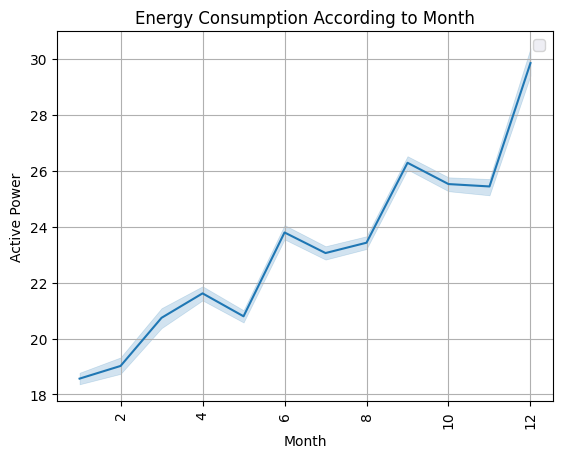

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')
sns.lineplot(x=dfn["month"], y=dfn["ActivePower_Avg"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin")
plt.xlabel("Month")
plt.ylabel("Active Power")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.title("Energy Consumption According to Month")

<ipython-input-15-56f1c710d109>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfn["ActivePower_Avg"])


Text(0.5, 1.0, 'Ennergy Distribution')

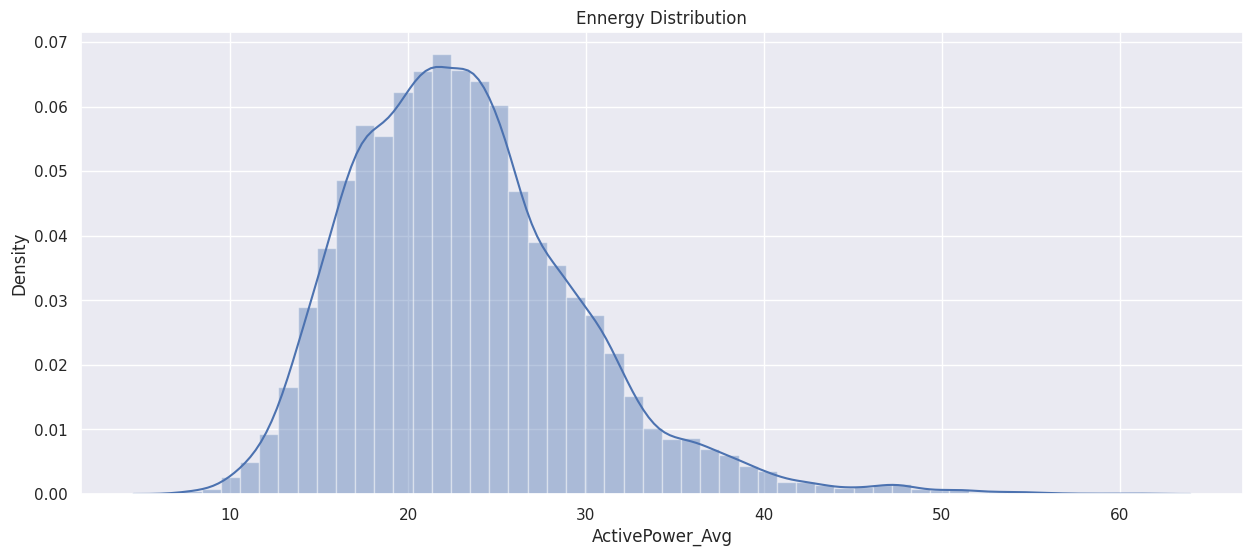

In [ ]:
sns.distplot(dfn["ActivePower_Avg"])
plt.title("Ennergy Distribution")

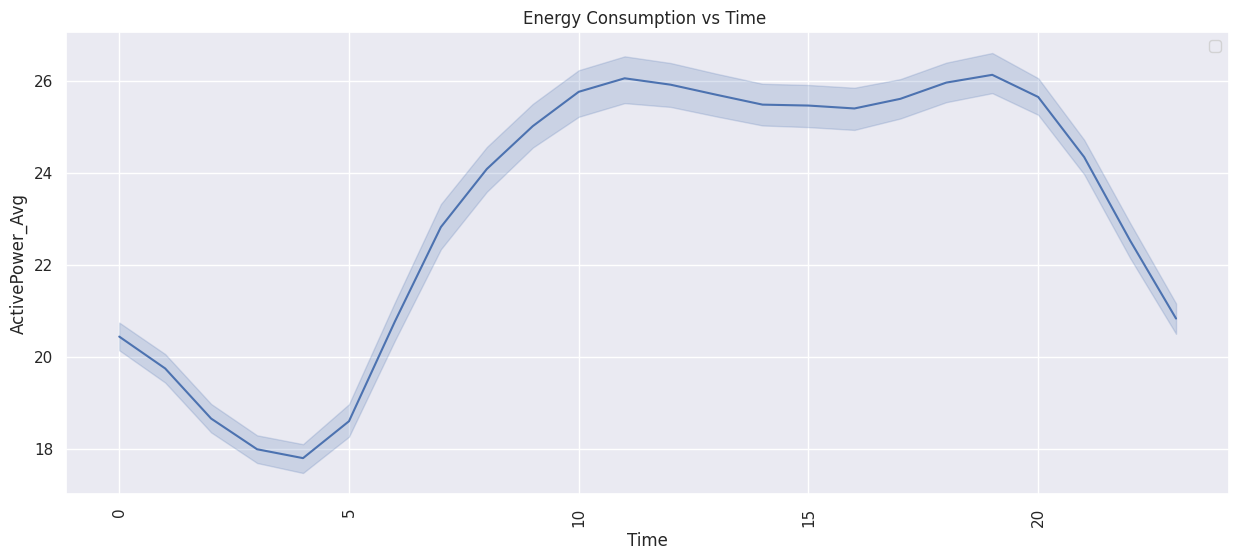

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dfn["hour"],y=dfn["ActivePower_Avg"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [ ]:
new_dfn=dfn.resample('D').mean()

In [ ]:
print("Old Dataset ",dfn.shape )
print("New  Dataset ",new_dfn.shape )

Old Dataset  (17520, 6)
New  Dataset  (365, 6)


In [ ]:
new_dfn.head(3)

,ActivePower_Avg,day,month,year,hour,minute
Date,,,,,,
2022-01-01 00:00:00+00:00,13.642917,1.0,1.0,2022.0,11.5,15.0
2022-01-02 00:00:00+00:00,14.337708,2.0,1.0,2022.0,11.5,15.0
2022-01-03 00:00:00+00:00,15.123958,3.0,1.0,2022.0,11.5,15.0


In [ ]:
testdata = new_dfn.tail(100)
trainset = new_dfn.iloc[:,0:1]
trainset = trainset[:-60]

In [ ]:
print('Training data shape: ',trainset.shape)
print('Test data shape: ',testdata.shape)

Training data shape:  (305, 1)
Test data shape:  (100, 6)


In [ ]:
print(trainset)

                           ActivePower_Avg
Date                                      
2022-01-01 00:00:00+00:00        13.642917
2022-01-02 00:00:00+00:00        14.337708
2022-01-03 00:00:00+00:00        15.123958
2022-01-04 00:00:00+00:00        19.224792
2022-01-05 00:00:00+00:00        20.999375
...                                    ...
2022-10-28 00:00:00+00:00        22.816042
2022-10-29 00:00:00+00:00        19.730208
2022-10-30 00:00:00+00:00        18.866875
2022-10-31 00:00:00+00:00        22.738125
2022-11-01 00:00:00+00:00        25.037083

[305 rows x 1 columns]


In [ ]:
trainset=np.array(trainset)
print(trainset)

[[13.64291667]
 [14.33770833]
 [15.12395833]
 [19.22479167]
 [20.999375  ]
 [21.5025    ]
 [20.180625  ]
 [13.87270833]
 [13.55479167]
 [20.99583333]
 [20.888125  ]
 [20.758125  ]
 [20.67041667]
 [20.133125  ]
 [16.69145833]
 [16.34520833]
 [19.84645833]
 [20.33520833]
 [20.149375  ]
 [19.98833333]
 [20.80875   ]
 [16.83875   ]
 [16.119375  ]
 [20.150625  ]
 [22.30458333]
 [21.755625  ]
 [20.235625  ]
 [19.744375  ]
 [14.98520833]
 [15.29208333]
 [18.1075    ]
 [20.84145833]
 [21.778125  ]
 [19.16145833]
 [18.3025    ]
 [15.77958333]
 [14.83145833]
 [19.49      ]
 [19.01791667]
 [18.26916667]
 [18.89895833]
 [18.88333333]
 [15.173125  ]
 [14.53895833]
 [18.99208333]
 [30.56541667]
 [31.60645833]
 [28.746875  ]
 [18.37791667]
 [16.08770833]
 [15.14645833]
 [18.17479167]
 [19.08708333]
 [15.2375    ]
 [16.46979167]
 [19.03125   ]
 [16.26125   ]
 [14.96354167]
 [18.86125   ]
 [19.92520833]
 [20.35791667]
 [19.51895833]
 [19.16333333]
 [16.88520833]
 [16.00020833]
 [19.18270833]
 [32.93083

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train = sc.fit_transform(trainset)

In [ ]:
XTrain = []
YTrain = []

# Range should be fromm 60 Values to END
for i in range(60, train.shape[0]):

    # X_Train 0-59
    XTrain.append(train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    YTrain.append(train[i])

# Convert into Numpy Array
XTrain = np.array(XTrain)
YTrain = np.array(YTrain)

print(XTrain.shape)
print(YTrain.shape)

(245, 60, 1)
(245, 1)


In [ ]:
XTrain = np.reshape(XTrain, newshape=(XTrain.shape[0], XTrain.shape[1], 1))
XTrain.shape

(245, 60, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *


regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (XTrain.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor.fit(XTrain, YTrain, epochs = 40, batch_size = 64)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.1920
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0792
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0436
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0501
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 0.0475
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - loss: 0.0394
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 0.0396
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0461
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - loss: 0.0451
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0373
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0440
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0397
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0394
Epoch 14/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0391
Epoch 15/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0431
Epoch 16/40
4/4 ━━━

In [ ]:
testdata.head(3)

,ActivePower_Avg,day,month,year,hour,minute
Date,,,,,,
2022-09-23 00:00:00+00:00,26.600208,23.0,9.0,2022.0,11.5,15.0
2022-09-24 00:00:00+00:00,23.470208,24.0,9.0,2022.0,11.5,15.0
2022-09-25 00:00:00+00:00,23.057292,25.0,9.0,2022.0,11.5,15.0


In [ ]:
testdata.shape

(100, 6)

In [ ]:
new_dfn.shape

(365, 6)

In [ ]:
df_total = pd.concat((new_dfn[["ActivePower_Avg"]], testdata[["ActivePower_Avg"]]), axis=0)
df_total.shape

(465, 1)

In [ ]:
inputs = df_total[len(df_total) - len(testdata) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = df_total[len(df_total) - len(testdata) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
pred = regressor.predict(X_test)

# Do inverse Transformation to get Values
pred = sc.inverse_transform(pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


In [ ]:
true = testdata["ActivePower_Avg"].to_list()
prediction  = pred
dates = testdata.index.to_list()

In [ ]:
machinedf = pd.DataFrame(data={
    "Date":dates,
    "True": true,
    "Prediction":[x[0] for x in prediction ]
})

In [ ]:
machinedf

,Date,True,Prediction
0,2022-09-23 00:00:00+00:00,26.600208,26.632664
1,2022-09-24 00:00:00+00:00,23.470208,26.416567
2,2022-09-25 00:00:00+00:00,23.057292,26.213493
3,2022-09-26 00:00:00+00:00,27.156667,26.023771
4,2022-09-27 00:00:00+00:00,28.332083,25.853756
...,...,...,...
95,2022-12-27 00:00:00+00:00,21.043333,27.717663
96,2022-12-28 00:00:00+00:00,21.510833,27.516182
97,2022-12-29 00:00:00+00:00,21.519792,27.302305
98,2022-12-30 00:00:00+00:00,22.045000,27.081303


In [ ]:

true = testdata["ActivePower_Avg"].to_list()
prediction = [x[0] for x in prediction ]
dates = testdata.index.to_list()

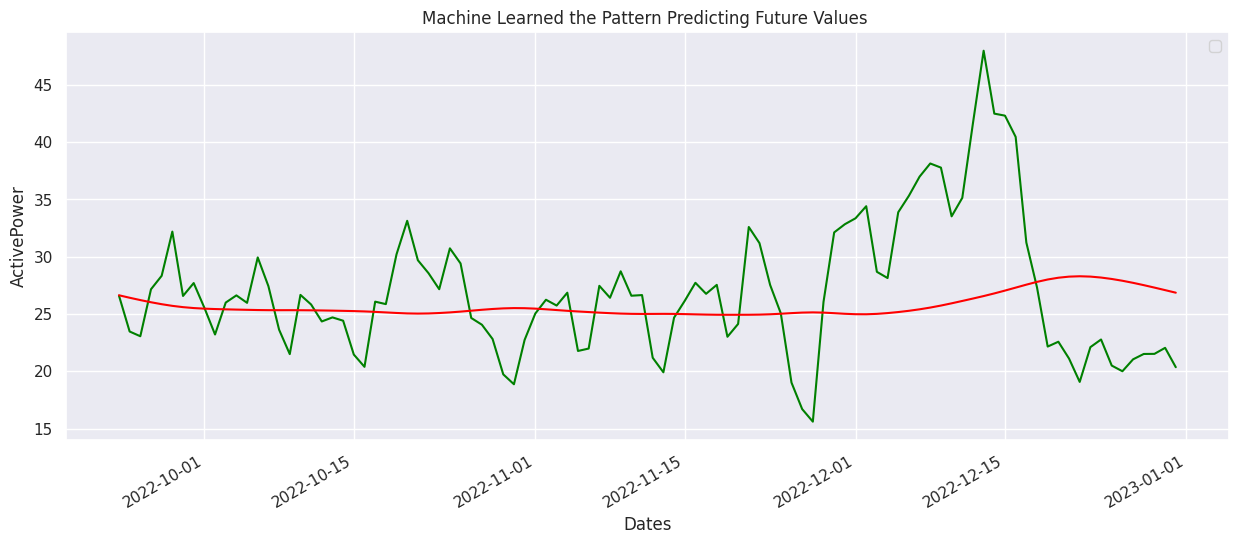

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = true

y1 = prediction

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("ActivePower")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()